In [1]:
%pip install pandas
%pip install requests
%pip install python-dotenv
%pip install matplotlib
%pip install seaborn
%pip install statsmodels
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -------------- ------------------------- 3.4/9.5 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 34.2 MB/s  0:00:00
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   ---------------- ----------------------- 14.7/36.3 MB 72.0 MB/s eta 0:00:01
   ----------------------- ---------------- 21.0/36.3 MB 50.5 MB/s eta 0:00:01
   -------------------------------------- - 35.1/36.3 MB 56.6 MB/s eta 0:00:01
   ---------------------------------------- 36.3/36.3 MB 47.3 MB/s  0:00:00

   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   -


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import requests
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
load_dotenv()

# Parametros da API FRED
FRED_API_KEY = os.getenv("FRED_API_KEY")
URL_FRED = os.getenv("URL_FRED")

end_point = 'series/observations'

# Ids do payroll, desemprego e índices de mercados
series_ids = ['PAYEMS', 'UNRATE' ,'NASDAQ100', 'SP500']

# Parametros da requisição

def return_params(series_ids):
    return {
        'series_id': series_ids,
        'api_key': FRED_API_KEY,
        'file_type': 'json',
    }

params = []
for param in series_ids:
    params.append(return_params(param))
params


[{'series_id': 'PAYEMS',
  'api_key': '1b2014ec8bef2c11b5361c34ff858288',
  'file_type': 'json'},
 {'series_id': 'UNRATE',
  'api_key': '1b2014ec8bef2c11b5361c34ff858288',
  'file_type': 'json'},
 {'series_id': 'NASDAQ100',
  'api_key': '1b2014ec8bef2c11b5361c34ff858288',
  'file_type': 'json'},
 {'series_id': 'SP500',
  'api_key': '1b2014ec8bef2c11b5361c34ff858288',
  'file_type': 'json'}]

In [6]:
# Lista de respostas da API
responses = []
obs_data = []
for param in params:
    response = requests.get(URL_FRED + end_point, params=param)
    if response.status_code == 200:
        res_data = (response.json())
        obs_data.append(pd.DataFrame(res_data['observations']))
        obs_data[-1]['date'] = pd.to_datetime(obs_data[-1]['date'])
        obs_data[-1].set_index('date', inplace=True)
        obs_data[-1]['value'] = pd.to_numeric(obs_data[-1]['value'], errors='coerce')
    else:
        print(f"Erro na requisição para {param['series_id']}: {response.status_code}")
    responses.append(response)

In [7]:
obs_data[1]

,realtime_start,realtime_end,value
date,,,
1948-01-01,2026-01-09,2026-01-09,3.4
1948-02-01,2026-01-09,2026-01-09,3.8
1948-03-01,2026-01-09,2026-01-09,4.0
1948-04-01,2026-01-09,2026-01-09,3.9
1948-05-01,2026-01-09,2026-01-09,3.5
...,...,...,...
2025-08-01,2026-01-09,2026-01-09,4.3
2025-09-01,2026-01-09,2026-01-09,4.4
2025-10-01,2026-01-09,2026-01-09,NaN


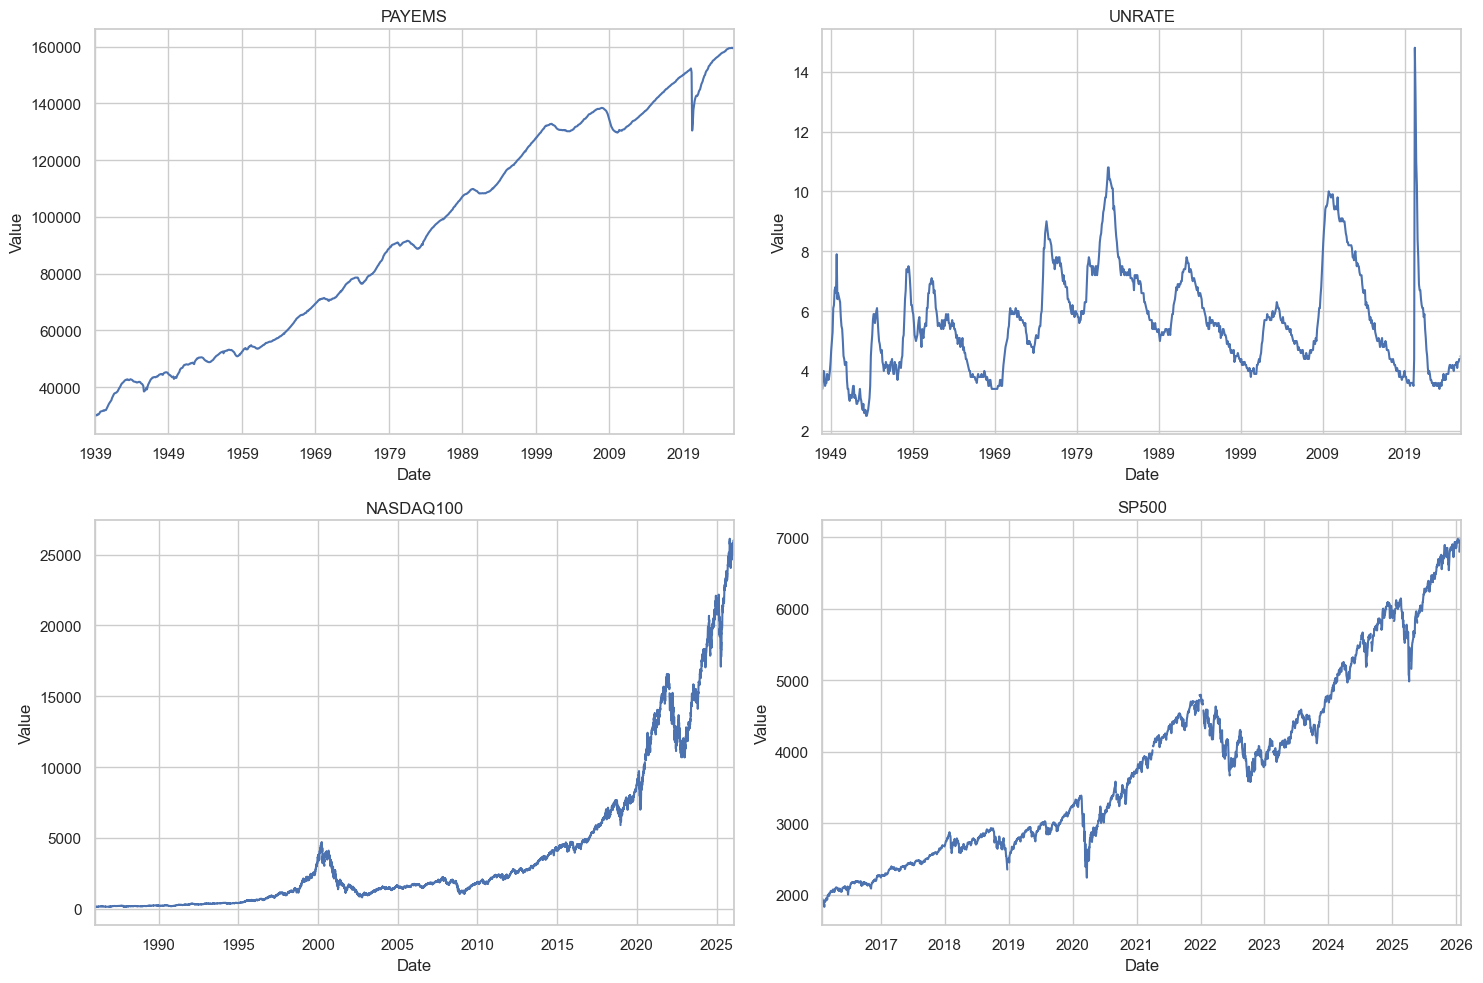

In [12]:
# Visualização dos dados
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(series_ids)):
    obs_data[i]['value'].plot(ax=axes[i], title=series_ids[i])
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

plt.tight_layout()
plt.show()